**Nama: Riski Pratama**

**DBS 2024 Machine Learning Advance**

#**1. Import Libraries**

### Penjelasan Cell

- **Tujuan**: [!pip install kaggle digunakan untuk menginstal library Kaggle di lingkungan Python].

In [1]:
!pip install kaggle

### Penjelasan Cell

- **Tujuan**: [ini adalah langkah awal untuk memuat dan menggunakan berbagai pustaka (libraries) eksternal yang menyediakan fungsi dan kelas untuk mempermudah pengolahan data dan pengembangan model].

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

#**2. Load and Prepare Dataset**

### Penjelasan Cell

- **Tujuan**: [Perintah ini digunakan untuk mengunggah file dari komputer lokal ke Google Colab].

In [3]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"riskipratama2000","key":"d7b1df41fd06755efa95a3a8f63ca742"}'}

### Penjelasan Cell

- **Tujuan**: [Perintah-perintah ini digunakan untuk mengonfigurasi API Kaggle di lingkungan Google Colab].

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


### Penjelasan Cell

- **Tujuan**: [Perintah ini digunakan untuk mengunduh dataset book-recommendation-dataset dari Kaggle].

In [5]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
 90% 22.0M/24.3M [00:02<00:00, 18.7MB/s]
100% 24.3M/24.3M [00:02<00:00, 11.9MB/s]


### Penjelasan Cell

- **Tujuan**: [Perintah ini digunakan untuk mengekstrak file ZIP yang bernama book-recommendation-dataset.zip].

In [6]:
!unzip book-recommendation-dataset.zip

Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: DeepRec.png             
  inflating: Ratings.csv             
  inflating: Users.csv               
  inflating: classicRec.png          
  inflating: recsys_taxonomy2.png    


### Penjelasan Cell

- **Tujuan**: [Perintah-perintah ini digunakan untuk membaca file CSV yang diekstrak sebelumnya dan memuatnya ke dalam DataFrame pandas].

In [7]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

<ipython-input-7-f6677f1956ea>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


### Penjelasan Cell

- **Tujuan**: [Perintah books.head() akan menampilkan lima baris pertama dari DataFrame books].

In [8]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Penjelasan Cell

- **Tujuan**: [Perintah ratings.head() akan menampilkan lima baris pertama dari DataFrame ratings].

In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Penjelasan Cell

- **Tujuan**: [Perintah users.head() akan menampilkan lima baris pertama dari DataFrame users].

In [10]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


##**Exploratory Data Analysis**


###**Univariate**

### Penjelasan Cell

- **Tujuan**: [Perintah books.info() akan memberikan informasi ringkas tentang DataFrame books].

In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


### Penjelasan Cell

- **Tujuan**: [Perintah ini adalah untuk membersihkan data dengan menghapus nilai yang tidak valid pada kolom Year-Of-Publication dan mengonversi kolom tersebut menjadi tipe data integer].

In [12]:
books = books[~books['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271357 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271357 non-null  object
 1   Book-Title           271357 non-null  object
 2   Book-Author          271355 non-null  object
 3   Year-Of-Publication  271357 non-null  int64 
 4   Publisher            271355 non-null  object
 5   Image-URL-S          271357 non-null  object
 6   Image-URL-M          271357 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.6+ MB


<ipython-input-12-182c66a57fb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)


### Penjelasan Cell

- **Tujuan**: [Menghapus kolom Image-URL-S, Image-URL-M, dan Image-URL-L dari DataFrame books, karena dianggap tidak diperlukan untuk analisis].

In [13]:
books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

### Penjelasan Cell

- **Tujuan**: [Menghitung dan menampilkan jumlah unik untuk setiap atribut buku, seperti ISBN, judul, penulis, tahun terbit, dan penerbit, untuk memahami distribusi data].

In [14]:
print(f"Jumlah ISBN Buku: {books['ISBN'].nunique()}")
print(f"Jumlah Judul Buku: {books['Book-Title'].nunique()}")
print(f"Jumlah Penulis Buku: {books['Book-Author'].nunique()}")
print(f"Jumlah Tahun Terbit Buku: {books['Year-Of-Publication'].nunique()}")
print(f"Jumlah Penerbit Buku: {books['Publisher'].nunique()}")

Jumlah ISBN Buku: 271357
Jumlah Judul Buku: 242132
Jumlah Penulis Buku: 102020
Jumlah Tahun Terbit Buku: 116
Jumlah Penerbit Buku: 16804


### Penjelasan Cell

- **Tujuan**: [Perintah ratings.info() adalah untuk menampilkan informasi struktur DataFrame ratings].

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Penjelasan Cell

- **Tujuan**: [Menghitung dan menampilkan jumlah unik User ID dan ISBN buku dalam dataset ratings untuk memahami cakupan data pengguna dan buku yang dinilai].

In [16]:
print(f"Jumlah User ID: {ratings['User-ID'].nunique()}")
print(f"Jumlah ISBN Buku: {ratings['ISBN'].nunique()}")

Jumlah User ID: 105283
Jumlah ISBN Buku: 340556


### Penjelasan Cell

- **Tujuan**: [Membuat visualisasi distribusi rating buku menggunakan histogram dengan Seaborn, sehingga memudahkan analisis pola dan frekuensi rating yang diberikan].

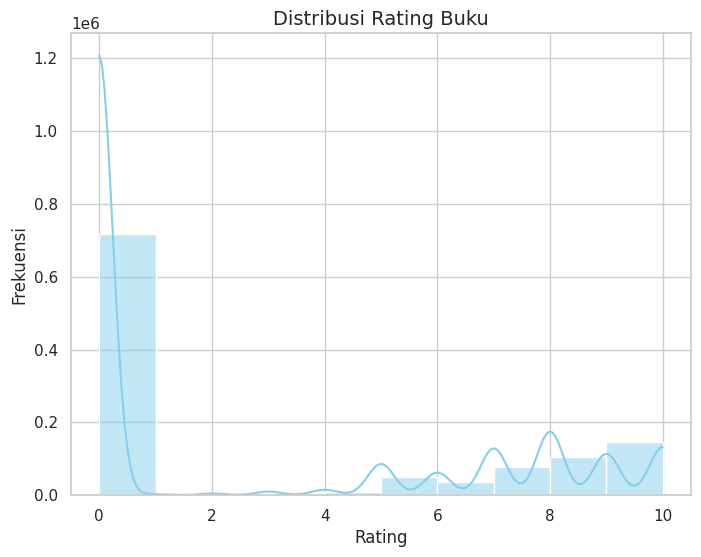

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(ratings['Book-Rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribusi Rating Buku", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.show()

### Penjelasan Cell

- **Tujuan**: [Menampilkan informasi struktur DataFrame users].

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### Penjelasan Cell

- **Tujuan**: [Menghitung jumlah unik User ID dan memvisualisasikan distribusi umur pengguna untuk memahami pola data pengguna].

Jumlah User ID: 105,283



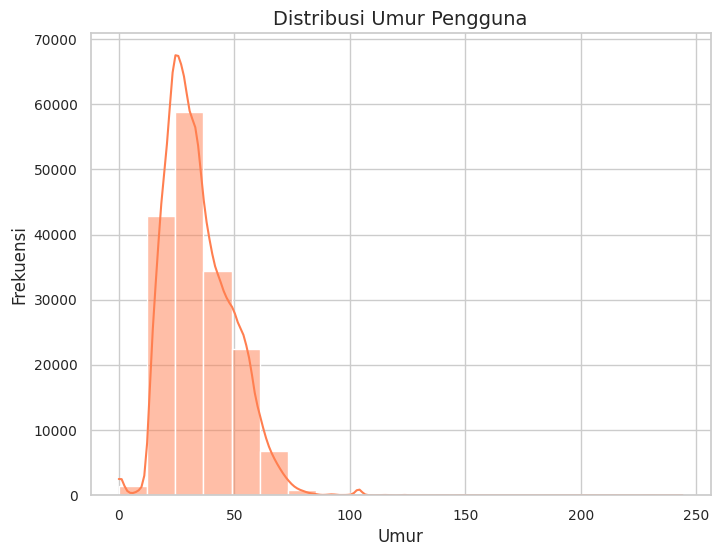

In [19]:
# Menampilkan jumlah User ID dengan format rapi
print(f"Jumlah User ID: {ratings['User-ID'].nunique():,}\n")

# Visualisasi distribusi umur
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(users['Age'], bins=20, kde=True, color='coral')
plt.title("Distribusi Umur Pengguna", fontsize=14)
plt.xlabel("Umur", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#**3.Data Preparation**


### Penjelasan Cell

- **Tujuan**: [Menghitung jumlah unik User ID dan memvisualisasikan distribusi umur pengguna untuk memahami pola data pengguna].

In [20]:
books_rating = ratings.merge(books, on='ISBN', how='left')
books_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press


### Penjelasan Cell

- **Tujuan**: [Menghitung jumlah nilai yang hilang (missing values) di setiap kolom DataFrame books_rating untuk memeriksa kelengkapan data setelah penggabungan].

In [21]:
books_rating.isna().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,118648
Book-Author,118650
Year-Of-Publication,118648
Publisher,118650


### Penjelasan Cell

- **Tujuan**: [ menghapus baris dengan nilai hilang dari books_rating, memeriksa nilai hilang setelah pembersihan, dan menampilkan dimensi dataset yang bersih].

In [22]:
books_clean = books_rating.dropna()
books_clean.isna().sum()
books_clean.shape

(1031128, 7)

### Penjelasan Cell

- **Tujuan**: [Menghapus baris dengan rating 0 dari DataFrame books_clean dan kemudian menampilkan dimensi (jumlah baris dan kolom) dataset yang sudah difilter].

In [23]:
books_clean = books_clean[(books_clean['Book-Rating'] != 0)]
books_clean.shape

(383837, 7)

### Penjelasan Cell

- **Tujuan**: [Menghapus baris duplikat berdasarkan kolom ISBN di DataFrame books_clean, menghasilkan DataFrame baru fix_books yang hanya berisi satu entri per buku].

In [24]:
fix_books = books_clean.drop_duplicates('ISBN')

### Penjelasan Cell

- **Tujuan**: [Mengonversi kolom Year-Of-Publication menjadi tipe data integer di DataFrame fix_books, dan kemudian menampilkan informasi tentang struktur dataset setelah konversi menggunakan info()].

In [25]:
fix_books['Year-Of-Publication'] = fix_books['Year-Of-Publication'].astype(int)
fix_books.info()

<ipython-input-25-f2f9e7d6b1bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_books['Year-Of-Publication'] = fix_books['Year-Of-Publication'].astype(int)


<class 'pandas.core.frame.DataFrame'>
Index: 149831 entries, 1 to 1149773
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              149831 non-null  int64 
 1   ISBN                 149831 non-null  object
 2   Book-Rating          149831 non-null  int64 
 3   Book-Title           149831 non-null  object
 4   Book-Author          149831 non-null  object
 5   Year-Of-Publication  149831 non-null  int64 
 6   Publisher            149831 non-null  object
dtypes: int64(3), object(4)
memory usage: 9.1+ MB


### Penjelasan Cell

- **Tujuan**: [Mengurutkan fix_books berdasarkan ISBN, mengonversi kolom-kolom menjadi list, dan memverifikasi jumlah elemen dalam setiap list].

In [26]:
preparation = fix_books
preparation.sort_values('ISBN')

isbn = preparation['ISBN'].tolist()
title = preparation['Book-Title'].tolist()
rating = preparation['Book-Rating'].tolist()
author = preparation['Book-Author'].tolist()
publication = preparation['Year-Of-Publication'].tolist()
publisher = preparation['Publisher'].tolist()

print(len(isbn))
print(len(title))
print(len(rating))
print(len(author))
print(len(publication))
print(len(publisher))

149831
149831
149831
149831
149831
149831


Jumlah datanya sama karena setiap kolom berasal dari DataFrame yang sama (fix_books) dan memiliki jumlah baris yang konsisten. Saat diubah menjadi list menggunakan tolist(), setiap kolom tetap mempertahankan jumlah elemen sesuai dengan jumlah baris dalam DataFrame.

### Penjelasan Cell

- **Tujuan**: [Membuat DataFrame baru books_df dari list yang telah disiapkan, dengan kolom-kolom yang berisi informasi buku seperti ISBN, Rating, Title, Author, Publication, dan Publisher].

In [27]:
books_df = pd.DataFrame({
    'ISBN': isbn,
    'Rating': rating,
    'Title': title,
    'Author': author,
    'Publication': publication,
    'Publisher': publisher
})

### Penjelasan Cell

- **Tujuan**: [Menampilkan lima baris pertama dari DataFrame books_df, memberikan gambaran umum tentang struktur dan isi data yang telah disusun].

In [28]:
books_df.head()

,ISBN,Rating,Title,Author,Publication,Publisher
0,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
1,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
3,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
4,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch


### Penjelasan Cell

- **Tujuan**: [Mengambil 10000 sampel acak dari DataFrame books_df dan menyimpannya dalam books_sample, dengan menggunakan random_state=123 untuk memastikan hasil yang konsisten setiap kali kode dijalankan].

In [29]:
books_sample = books_df.sample(n=10000, random_state=123)

#**4. Model Development**

### Penjelasan Cell

- **Tujuan**: [menampilkan 5 sampel acak dari DataFrame data (yang berisi books_sample)].

In [30]:
data = books_sample
data.sample(5)

,ISBN,Rating,Title,Author,Publication,Publisher
101779,0312198353,7,Bite-Size Franklin: Wit &amp; Wisdom from a Fo...,Benjamin Franklin,1999,St Martins Pr
61133,0970335539,7,The Pharmacist's Mate,Amy Fusselman,2001,McSweeney's Books
111869,2910188701,9,L'Alchimiste,Paulo Coelho,1995,Anne CarriÃ?Â¨re
96447,1891824333,10,The Mystical Journey of Ratho Shenzi,Mark S. Cohen,2002,Light Technology Publishing
74383,0913299804,10,Pain: The Challenge and the Gift,Marti Lynn Matthews,1991,Pub Group West


### Penjelasan Cell

- **Tujuan**: [Membuat dan melatih model TF-IDF (Term Frequency-Inverse Document Frequency) pada kolom Author dari DataFrame data, yang digunakan untuk mengubah teks nama penulis menjadi representasi numerik berbasis frekuensi kata yang penting dalam teks tersebut].

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()
tfid.fit(data['Author'])

TfidfVectorizer()

### Penjelasan Cell

- **Tujuan**: [Mengonversi kolom Author menjadi matriks TF-IDF menggunakan fit_transform(), dan kemudian memeriksa ukuran matriks TF-IDF dengan shape untuk mengetahui dimensi hasil transformasi, yaitu jumlah baris dan kolom dalam matriks tersebut].

In [32]:
tfidf_matrix = tfid.fit_transform(data['Author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(10000, 7173)

### Penjelasan Cell

- **Tujuan**: [mengonversi matriks TF-IDF yang berbentuk sparse menjadi DataFrame yang padat (dense), dengan kolom yang mewakili fitur (kata-kata unik) dan indeks yang mewakili judul buku. Kemudian, kode ini menampilkan 22 kolom acak dan 10 baris acak dari DataFrame tersebut untuk melihat representasi TF-IDF dari buku-buku yang dipilih].

In [33]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=data.Title
).sample(22, axis=1).sample(10, axis=0)

,kazuo,ankerberg,esaki,enoch,benard,rand,stabenow,critchley,jhonen,brassard,...,earlene,ruby,darrin,ardian,zahn,rewolinski,undset,dixon,gerin,holbrook
Title,,,,,,,,,,,,,,,,,,,,,
100 hikes in the South Cascades and Olympics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The 50 Greatest Jewish Movies: A Critic's Ranking of the Very Best,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Sound and the Fury: An Authoritative Text Backgrounds and Contexts Criticism (Norton Critical Editions),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bride By Choice (Italian Grooms) (Romance, 3684)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Penguin Book of Irish Verse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Coming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Forgotten (Peter Decker &amp; Rina Lazarus Novels (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Testing Object-Oriented Systems: Models, Patterns, and Tools (The Addison-Wesley Object Technology Series)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Best Is Yet to Come,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Penjelasan Cell

- **Tujuan**: [Menghitung kemiripan kosinus antara setiap pasangan buku berdasarkan representasi TF-IDF dari kolom Author. Hasilnya adalah matriks kemiripan kosinus yang menunjukkan seberapa mirip satu buku dengan buku lainnya berdasarkan penulisnya].

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Penjelasan Cell

- **Tujuan**: [Membuat matriks kemiripan kosinus antara buku, memeriksa dimensinya, dan menampilkan sebagian acak dari matriks tersebut].

In [35]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Title'], columns=data['Title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (10000, 10000)


Title,Q: [romanzo] (Stile libero),Barnaby Rudge,Arise and walk: The Christian search for meaning in suffering,The Taming of the Chew: A Holistic Guide to Stopping Compulsive Eating,The New Dalmatian: Coach Dog : Firehouse Dog
Title,,,,,
"Junie B., First Grader: Boss of Lunch (Junie B Jones)",0.0,0.0,0.0,0.0,0.0
The Life Stone of Singing Bird,0.0,0.0,0.0,0.0,0.0
In the Absence of Sun : A Korean American Woman's Promise to Reunite Three Lost Generations of HerFamily,0.0,0.0,0.0,0.0,0.0
Restoration Plays (Everyman Paperback Classics),0.0,0.0,0.0,0.0,0.0
The Witch's Guide to Life,0.0,0.0,0.0,0.0,0.0
Never Trust a Rabbit,0.0,0.0,0.0,0.0,0.0
The Sea-Wolf and Other Stories (Penguin Twentieth-Century Classics),0.0,0.0,0.0,0.0,0.0
Dreams Made Easy: An Introduction To The Basics Of The Ancient Art Of Dream Interpretation,0.0,0.0,0.0,0.0,0.0
"My Secret Valentine (36 Hours) (Silhouette Intimate Moments, No 1052)",0.0,0.0,0.0,0.0,0.0


### Penjelasan Cell

- **Tujuan**: [Mendefinisikan fungsi book_recommendations yang memberikan rekomendasi buku berdasarkan kemiripan dengan buku yang diberikan (title), menggunakan matriks kemiripan (similarity_data). Fungsi ini mengembalikan daftar buku terdekat dengan buku yang dipilih, dengan jumlah rekomendasi sebanyak k].

In [36]:
def book_recommendations(title, similarity_data=cosine_sim_df, items=data[['Title', 'Author']], k=10):
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(title, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

### Penjelasan Cell

- **Tujuan**: [Menampilkan 10 sampel acak dari kolom Title pada DataFrame data].

In [37]:
data.Title.sample(10)

,Title
23589,Kingdom Alliance: Ruin Mist Chronicles
98259,The Mythmaker: Paul And the Invention Of Chris...
48008,Life's Little Treasure Book On Friendship (Lif...
113569,Stolen Property: Returned
145084,The Berenstains' B Book (Bright and Early Book...
141784,Foods That Cause You to Lose Weight: : The Neg...
107365,The Backyard Tribe
68702,"Hanni und Nanni, Bd.8, Hanni und Nanni in taus..."
619,Prehistory of the Far Side
111864,Fall of the House of Usher and Other Stories (...


### Penjelasan Cell

- **Tujuan**: [Mencari dan menampilkan baris dalam DataFrame data yang memiliki judul buku "The Chamber". Fungsi eq() digunakan untuk mencocokkan nilai yang tepat di kolom Title].

In [38]:
data[data.Title.eq("The Chamber")]

,ISBN,Rating,Title,Author,Publication,Publisher
23432,0553472348,7,The Chamber,John Grisham,1994,Random House Audio


### Penjelasan Cell

- **Tujuan**: [Mendapatkan rekomendasi buku yang mirip dengan "Harry Potter" menggunakan fungsi book_recommendations].

In [39]:
book_recommendations('The Chamber')

,Title,Author
0,The Partner,John Grisham
1,"Cliente, El",John Grisham
2,The Runaway Jury,JOHN GRISHAM
3,The Street Lawyer,John Grisham
4,The Unicorn Peace,John Lee
5,"\15-1\"": the Master Challenge (A Channel Four ...",John Lewis
6,Java Software Solutions : Foundations of Progr...,John Lewis
7,Crime Classification Manual : A Standard Syste...,John E. Douglas
8,The Cases That Haunt Us,John Douglas
9,JOURNEY INTO DARKNESS (Lisa Drew Books (Paperb...,John E. Douglas


### Penjelasan Cell

- **Tujuan**: [mengambil 10000 sampel acak dari DataFrame ratings, mengacak data, dan kemudian mereset indeksnya dengan reset_index()].

In [40]:
ratings_sample = ratings.sample(n=10000, random_state=123).reset_index()

### Penjelasan Cell

- **Tujuan**: [menampilkan 5 baris pertama dari DataFrame df (yang berisi sampel acak dari ratings_sample)].

In [41]:
df = ratings_sample
df.head()

,index,User-ID,ISBN,Book-Rating
0,229535,52917,1558534202,6
1,817972,198711,0394426290,0
2,101577,23768,0375412530,0
3,1123282,269566,0446605484,0
4,339655,81050,1586480375,7


### Penjelasan Cell

- **Tujuan**: [Mengonversi User-ID menjadi angka terurut (encoding) dan sebaliknya, agar bisa digunakan dalam analisis atau model].

In [42]:
user_ids = df['User-ID'].unique().tolist()
print('list userID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User-ID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke UserID: ', user_encoded_to_user)

list userID:  [52917, 198711, 23768, 269566, 81050, 183088, 206534, 148744, 217740, 3363, 11676, 156264, 95010, 32195, 128835, 261829, 225989, 227447, 81088, 97324, 151608, 100098, 40754, 277639, 119594, 97423, 178522, 88122, 91745, 264543, 118365, 177180, 156150, 189678, 81492, 25981, 277187, 11724, 104399, 158421, 234948, 266491, 42400, 144031, 94241, 82751, 275573, 233911, 36554, 146156, 238120, 176902, 40943, 114988, 196393, 174791, 130571, 196523, 224525, 224764, 48364, 207825, 211426, 78783, 71259, 151877, 14638, 95359, 252695, 55548, 36839, 59038, 71752, 17507, 179978, 162639, 231210, 214023, 238890, 142468, 7898, 107044, 146428, 166596, 246104, 94923, 273071, 204864, 35050, 247176, 251791, 216882, 176062, 196109, 228764, 189516, 75860, 195116, 167800, 23511, 116210, 266866, 164096, 253114, 87143, 188273, 135149, 243942, 56276, 223210, 249924, 212898, 152786, 61901, 26598, 204644, 220171, 245371, 102967, 200557, 81977, 98391, 197659, 113519, 29259, 263149, 235105, 76352, 36003, 

### Penjelasan Cell

- **Tujuan**: [Mengonversi ISBN menjadi angka terurut (encoding) dan sebaliknya, agar bisa digunakan dalam analisis atau model].

In [43]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
books_ids = df['ISBN'].unique().tolist()

# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(books_ids)}

# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(books_ids)}

### Penjelasan Cell

- **Tujuan**: [Menambahkan kolom hasil encoding User-ID dan ISBN ke DataFrame df].

In [44]:
# Mapping kedalam variable baru
df['user'] = df['User-ID'].map(user_to_user_encoded)
df['ISBN-Book'] = df['ISBN'].map(book_to_book_encoded)

### Penjelasan Cell

- **Tujuan**: [menghitung jumlah pengguna, buku, rentang rating, dan mengonversi Book-Rating ke tipe float32].

In [45]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_books = len(book_encoded_to_book)
print(num_books)

df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)

# Nilai minimum Book-Rating
min_rating = min(df['Book-Rating'])

# Nilai maksimal Book-Rating
max_rating = max(df['Book-Rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_books, min_rating, max_rating
))

5367
8847
Number of User: 5367, Number of Resto: 8847, Min Rating: 0.0, Max Rating: 10.0


### Penjelasan Cell

- **Tujuan**: [Mengacak urutan data dalam DataFrame df untuk menghilangkan bias urutan dengan menggunakan sample(frac=1)].

In [46]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,index,User-ID,ISBN,Book-Rating,user,ISBN-Book
6252,835122,201768,0312925883,0.0,3093,5727
4684,268357,62272,0385502532,0.0,1398,3224
1731,613604,148514,0892435666,0.0,1016,1673
4742,1073327,256507,0553271636,0.0,2140,4411
4521,1117870,268171,0441004016,9.0,2938,4217
...,...,...,...,...,...,...
5734,273015,63714,0707304466,10.0,889,5278
5191,76092,16538,0345353145,9.0,3259,1401
5390,544495,130658,0515135062,0.0,379,4973
860,916536,223354,0312421273,10.0,726,838


### Penjelasan Cell

- **Tujuan**: [Membuat fitur (x), label (y), lalu membagi data menjadi 80% pelatihan dan 20% validasi].

In [47]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'ISBN-Book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[3093 5727]
 [1398 3224]
 [1016 1673]
 ...
 [ 379 4973]
 [ 726  838]
 [2280 6592]] [0. 0. 0. ... 0. 1. 0.]


### Penjelasan Cell

- **Tujuan**: [membuat model rekomendasi buku berbasis embedding untuk memprediksi interaksi pengguna-buku menggunakan dot product dan sigmoid].

In [48]:
class BookRecommender(tf.keras.Model):

  # Inisialisasi fungsi
  def __init__(self, num_users, num_books, embedding_dim, **kwargs):
    super(BookRecommender, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_dim = embedding_dim
    self.user_embedding_layer = layers.Embedding(  # embedding untuk pengguna
        num_users,
        embedding_dim,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    self.user_bias_layer = layers.Embedding(num_users, 1)  # embedding bias pengguna
    self.book_embedding_layer = layers.Embedding(  # embedding untuk buku
        num_books,
        embedding_dim,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    self.book_bias_layer = layers.Embedding(num_books, 1)  # embedding bias buku

  def call(self, inputs):
    user_embedded = self.user_embedding_layer(inputs[:, 0])  # mengambil embedding pengguna
    user_bias = self.user_bias_layer(inputs[:, 0])  # mengambil bias pengguna
    book_embedded = self.book_embedding_layer(inputs[:, 1])  # mengambil embedding buku
    book_bias = self.book_bias_layer(inputs[:, 1])  # mengambil bias buku

    # Menghitung hasil perkalian dot produk antara vektor pengguna dan buku
    interaction = tf.tensordot(user_embedded, book_embedded, axes=2)

    # Menambahkan bias dan hasil interaksi
    result = interaction + user_bias + book_bias

    return tf.nn.sigmoid(result)  # fungsi aktivasi sigmoid


### Penjelasan Cell

- **Tujuan**: [Meng-compile model BookRecommender dengan loss Binary Crossentropy, optimizer Adam, dan metric RMSE].

In [49]:
model = BookRecommender(num_users, num_books, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

### Penjelasan Cell

- **Tujuan**: [Melatih model BookRecommender dengan data pelatihan (x_train, y_train) selama 100 epoch, menggunakan batch size 8, dan memvalidasi model pada data validasi (x_val, y_val)].

In [50]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6916 - root_mean_squared_error: 0.4370 - val_loss: 0.6828 - val_root_mean_squared_error: 0.4339
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6449 - root_mean_squared_error: 0.4111 - val_loss: 0.6747 - val_root_mean_squared_error: 0.4289
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5667 - root_mean_squared_error: 0.3662 - val_loss: 0.6695 - val_root_mean_squared_error: 0.4257
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5481 - root_mean_squared_error: 0.3553 - val_loss: 0.6647 - val_root_mean_squared_error: 0.4229
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5303 - root_mean_squared_error: 0.3478 - val_loss: 0.6593 - val_root_mean_squared_error: 0.4197
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5181 - root_mean_squared_error: 0.3386 - val_loss: 0.6544 - val_root_mean_squared_error: 0.4169
Epoch 7/100
1000/1000 ━━━━━━━━━━━━

### Penjelasan Cell

- **Tujuan**: [Memvisualisasikan perubahan RMSE (Root Mean Squared Error) selama proses pelatihan dan validasi model, dengan menampilkan grafik untuk Train RMSE dan Validation RMSE sepanjang epoch].

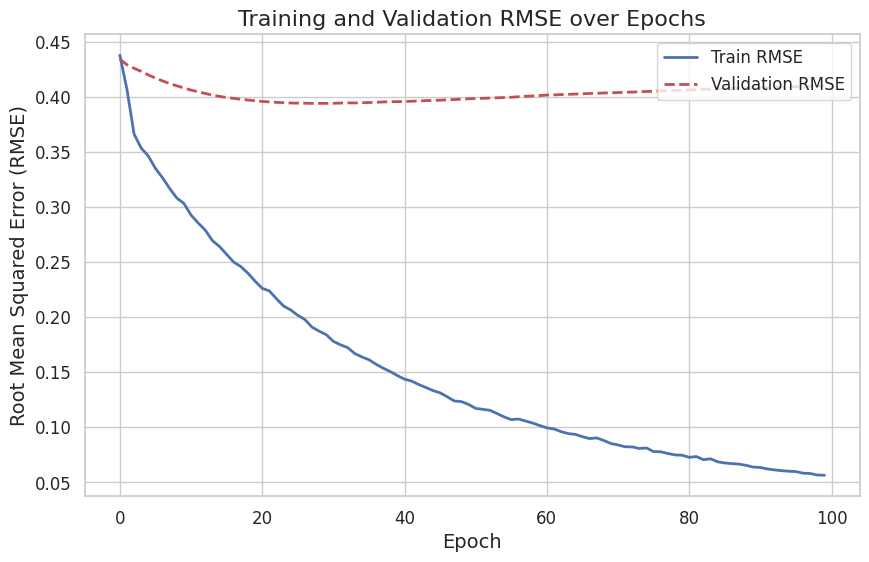

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE', color='b', linewidth=2)
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE', color='r', linewidth=2, linestyle='--')
plt.title('Training and Validation RMSE over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Penjelasan Cell

- **Tujuan**: [mengidentifikasi buku yang belum dibaca oleh pengguna dan membuat array pasangan pengguna dengan buku tersebut untuk rekomendasi].

In [52]:
books_df = books
df_ratings = ratings_sample

# mengambil sample user
user_id = df_ratings['User-ID'].sample(1).iloc[0]
book_read_by_user = df_ratings[df_ratings['User-ID'] == user_id]


book_no_read = books_df[~books_df['ISBN'].isin(book_read_by_user['User-ID'].values)]['ISBN']
book_no_read = list(
    set(book_no_read)
    .intersection(set(book_to_book_encoded.keys()))
)

book_no_read = [[book_to_book_encoded.get(x)] for x in book_no_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_no_read), book_no_read)
)

### Penjelasan Cell

- **Tujuan**: [Menampilkan 5 buku teratas dan terbawah yang direkomendasikan model, serta menampilkan 5 buku yang sudah dibaca pengguna].

In [53]:
user_ratings = model.predict(user_book_array).flatten()

# Menyortir rating dan mendapatkan 5 teratas dan 5 terbawah
top_rated_indices = user_ratings.argsort()[-5:][::-1]  # 5 teratas
bottom_rated_indices = user_ratings.argsort()[:5]  # 5 terbawah

recommended_books_ids_top = [
    book_encoded_to_book.get(book_no_read[i][0]) for i in top_rated_indices
]

recommended_books_ids_bottom = [
    book_encoded_to_book.get(book_no_read[i][0]) for i in bottom_rated_indices
]

# Menampilkan rekomendasi untuk pengguna
print(f"Showing recommendations for user: {user_id}")
print("=" * 30)
print("Books rated highly by user:")
print("-" * 32)

# Mendapatkan 5 buku teratas yang sudah dibaca oleh pengguna
top_rated_books_by_user = (
    book_read_by_user.sort_values(by='Book-Rating', ascending=False)
    .head(5)
    .ISBN.values
)

# Menampilkan informasi buku yang sudah dibaca
user_books_df = books_df[books_df['ISBN'].isin(top_rated_books_by_user)]
for row in user_books_df.itertuples():
    print(f"{row._2}: {row._3}")

print("-" * 32)
print("Top 5 Book Recommendations:")
print("-" * 32)

# Menampilkan rekomendasi buku yang diprediksi (5 teratas)
recommended_books_df_top = books_df[books_df['ISBN'].isin(recommended_books_ids_top)]
for row in recommended_books_df_top.itertuples():
    print(f"{row._2}: {row._3}")

print("-" * 32)
print("Bottom 5 Book Recommendations:")
print("-" * 32)

# Menampilkan rekomendasi buku yang diprediksi (5 terbawah)
recommended_books_df_bottom = books_df[books_df['ISBN'].isin(recommended_books_ids_bottom)]
for row in recommended_books_df_bottom.itertuples():
    print(f"{row._2}: {row._3}")


247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for user: 251394
Books rated highly by user:
--------------------------------
Pigs in Heaven: Barbara Kingsolver
The Dog Soldiers: Robert Stone
Demetrius and the Golden Goblet: Eve Bunting
Distant Mirrors: America as a Foreign Culture: Philip R. Devita
--------------------------------
Top 5 Book Recommendations:
--------------------------------
Seabiscuit: An American Legend: LAURA HILLENBRAND
The Phantom Tollbooth: Norton Juster
Cold Sassy Tree: Olive Ann Burns
Forbidden Magic: Jo Beverley
Attack Of The Deranged Mutant Killer Snow Goons: Bill Watterson
--------------------------------
Bottom 5 Book Recommendations:
--------------------------------
Deception Point: Dan Brown
The Plains of Passage (Earth's Children (Paperback)): JEAN M. AUEL
The Summons: John Grisham
Cold Mountain: Charles Frazier
Scarlet Feather: Maeve Binchy


#**5.Model Evaluation**

### Penjelasan Cell

- **Tujuan**: [Membuat rekomendasi buku dan menghitung metrik evaluasi (precision, recall, F1-score) berdasarkan cosine similarity antara buku-buku].

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score


# menentukan batasan similarity 1 atau 0
threshold = 0.5

# rekomendasi berdasarkan judul
true_title = 'The Chamber'
predicted_books = book_recommendations(true_title, similarity_data=cosine_sim_df, items=data[['Title', 'Author']], k=10)

#  Menyusun data label_truth dengan asumsi threshold
label_truth = np.where(cosine_sim_df >= threshold, 1, 0)

# Mengambil subset dari matriks similarity dan label_truth
sample_size = 10000
cosine_sim_sample = cosine_sim_df.iloc[:sample_size, :sample_size]
label_truth_sample = label_truth[:sample_size, :sample_size]

# Mengonversi matriks similarity menjadi array satu dimensi untuk perbandingan
cosine_sim_flat = cosine_sim_sample.values.flatten()

# Mengonversi matriks label_truth menjadi array satu dimensi
label_truth_flat = label_truth_sample.flatten()

# Menghitung metrik evaluasi
precision = precision_score(label_truth_flat, (cosine_sim_flat >= threshold).astype(int), zero_division=1)
recall = recall_score(label_truth_flat, (cosine_sim_flat >= threshold).astype(int), zero_division=1)
f1 = f1_score(label_truth_flat, (cosine_sim_flat >= threshold).astype(int), zero_division=1)

evaluation_result = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Value': [precision, recall, f1]
})


### Penjelasan Cell

- **Tujuan**: [Evaluation_result adalah sebuah DataFrame yang berisi hasil evaluasi dari sistem rekomendasi buku, dengan metrik Precision, Recall, dan F1-Score. ].

In [55]:
evaluation_result.style \
    .background_gradient(cmap='Blues') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#4CAF50'), ('color', 'white')]
    }, {
        'selector': 'td',
        'props': [('font-size', '14px'), ('padding', '10px')]
    }]) \
    .hide(axis="index")


Metric,Value
Precision,1.000000
Recall,1.000000
F1-Score,1.000000


### Penjelasan Cell

- **Tujuan**: [Menghitung RMSE untuk mengevaluasi prediksi rating buku oleh model, dengan membandingkan rating yang diprediksi dan yang sebenarnya. Semakin rendah RMSE, semakin akurat model].

In [56]:
from sklearn.metrics import mean_squared_error

# Prediksi rating untuk buku yang tidak dibaca oleh user
predicted_ratings = model.predict(user_book_array).flatten()

# Gabungkan recommended_books_ids_top dan recommended_books_ids_bottom
# untuk mendapatkan semua buku yang direkomendasikan
recommended_book_ids = recommended_books_ids_top + recommended_books_ids_bottom

# Ambil rating sebenarnya untuk buku yang tidak dibaca oleh user
true_ratings = np.array([
    df_ratings[
        (df_ratings['User-ID'] == user_id) &
        (df_ratings['ISBN'] == book_encoded_to_book.get(book_id))
    ]['Book-Rating'].values[0]
    if not df_ratings[
        (df_ratings['User-ID'] == user_id) &
        (df_ratings['ISBN'] == book_encoded_to_book.get(book_id))
    ].empty
    else 0  # Atau nilai default sesuai kebutuhan Anda
    for book_id in recommended_book_ids
])

# Pastikan panjang true_ratings dan predicted_ratings sama
min_len = min(len(true_ratings), len(predicted_ratings))
true_ratings = true_ratings[:min_len]
predicted_ratings = predicted_ratings[:min_len]

# Hitung RMSE
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))

print(f'RMSE: {rmse}')

247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 0.35289653979879504
